In [1]:
import os, math, sys
from sys import stdout

import numpy as np
import matplotlib.pyplot as plt
import openmm.app  as omm_app
import openmm as omm
import simtk.unit as unit
from tqdm import tqdm

import MDAnalysis as mda
from MDAnalysis.analysis import align, rms


/Users/shashanksule/miniforge3/envs/mdenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/shashanksule/miniforge3/envs/mdenv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


# Get data: cosine of dihedral angle

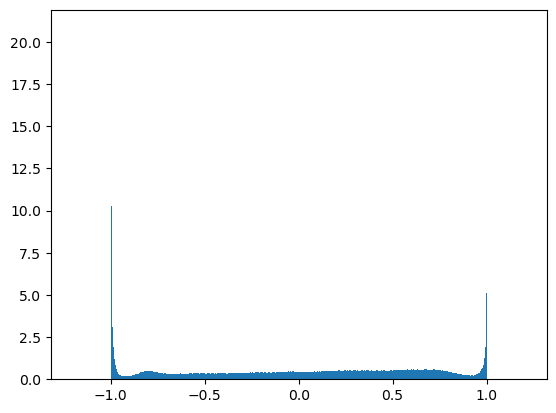

In [2]:
dihedrals = np.loadtxt( f"dihedral_metad_trial.csv", delimiter = ",")
density = plt.hist(np.cos(dihedrals),bins=1000, range=(-1.2,1.2), density=True)

In [3]:
T = 300 * unit.kelvin  ## temperature
kbT = unit.BOLTZMANN_CONSTANT_kB * T * unit.AVOGADRO_CONSTANT_NA 
kbT = kbT.value_in_unit(unit.kilojoule_per_mole)

kbT_roomtemp = unit.BOLTZMANN_CONSTANT_kB*unit.AVOGADRO_CONSTANT_NA*300.0*unit.kelvin
kbT_roomtemp = kbT_roomtemp.value_in_unit(unit.kilojoule_per_mole)

# Estimate biased density

In [4]:
import scipy
kde_data = scipy.stats.gaussian_kde(np.cos(dihedrals),bw_method=0.25)
estimated_density = kde_data.pdf(np.linspace(-1.0,1.0,1000,endpoint=False))

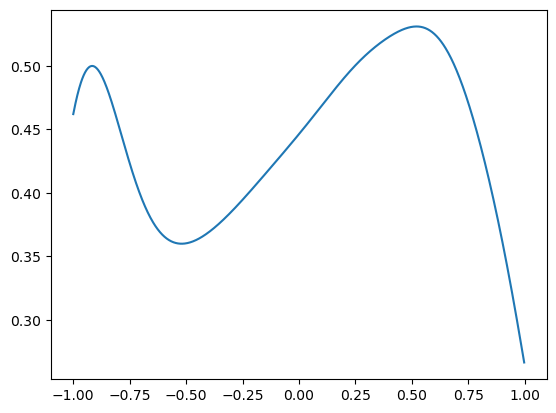

In [5]:
plt.plot(np.linspace(-1.0,1.0,1000,endpoint=False), estimated_density)

# Get deposited bias

In [6]:
total_bias = np.load(f'bias_cosdihedral.npy') 
bias_interpolant = scipy.interpolate.PchipInterpolator(np.linspace(-1.2,1.2,1000), total_bias)
bias_interpolated = bias_interpolant(np.linspace(-1.0,1.0,1000, endpoint=False))
biased_force = -kbT*np.log(estimated_density)

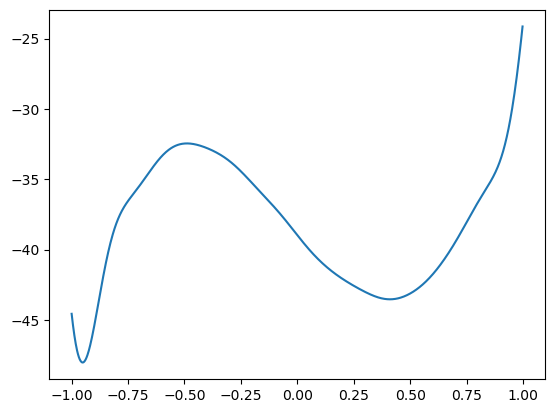

In [7]:
plt.plot(np.linspace(-1.0,1.0,1000,endpoint=False), biased_force-bias_interpolated)